<a href="https://colab.research.google.com/github/ask350/UM-Projects/blob/main/Liver_Cirrhosis/liver_cirrhosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1 - Download Data

import os
import gdown
import pandas as pd
import numpy as np

url = "https://drive.google.com/file/d/1l4KpjxvL-pZR3GHloxQwOCLw3nprxvO-/view?usp=drive_link"
output = "liver_cirrhosis.csv"
gdown.download(url, output, quiet=False, fuzzy=True)

df = pd.read_csv("liver_cirrhosis.csv")
print("Dataset shape:", df.shape)
df.head()


Downloading...
From: https://drive.google.com/uc?id=1l4KpjxvL-pZR3GHloxQwOCLw3nprxvO-
To: /content/liver_cirrhosis.csv
100%|██████████| 2.35M/2.35M [00:00<00:00, 176MB/s]


Dataset shape: (25000, 19)


,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1


In [2]:
# 2 - EDA

from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("liver_cirrhosis.csv")
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
display(df.head())
print("\nMissing values per column:")
display(df.isnull().sum().to_frame("missing_count"))

# Target distribution
print("\nTarget distribution (Stage):")
display(df['Stage'].value_counts().to_frame('count'))
display((df['Stage'].value_counts(normalize=True)*100).round(2).to_frame('%'))

# Summary
display(df.describe().T)



Shape: (25000, 19)
Columns: ['N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']


,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1



Missing values per column:


,missing_count
N_Days,0
Status,0
Drug,0
Age,0
Sex,0
Ascites,0
Hepatomegaly,0
Spiders,0
Edema,0
Bilirubin,0



Target distribution (Stage):


,count
Stage,
2,8441
3,8294
1,8265


,%
Stage,
2,33.76
3,33.18
1,33.06


,count,mean,std,min,25%,50%,75%,max
N_Days,25000.0,1887.117040,1091.690918,41.00,1080.00,1680.000000,2576.000000,4795.00
Age,25000.0,18495.877080,3737.596616,9598.00,15694.00,18499.000000,20955.000000,28650.00
Bilirubin,25000.0,3.402644,4.707491,0.30,0.80,1.300000,3.400000,28.00
Cholesterol,25000.0,372.331471,193.668452,120.00,275.00,369.510563,369.510563,1775.00
Albumin,25000.0,3.486578,0.380488,1.96,3.29,3.510000,3.750000,4.64
Copper,25000.0,100.184663,73.184840,4.00,52.00,97.648387,107.000000,588.00
Alk_Phos,25000.0,1995.675597,1798.885660,289.00,1032.00,1828.000000,1982.655769,13862.40
SGOT,25000.0,123.166345,47.747616,26.35,92.00,122.556346,134.850000,457.25
Tryglicerides,25000.0,123.822548,52.786350,33.00,92.00,124.702128,127.000000,598.00
Platelets,25000.0,256.007337,98.679006,62.00,189.00,251.000000,311.000000,721.00


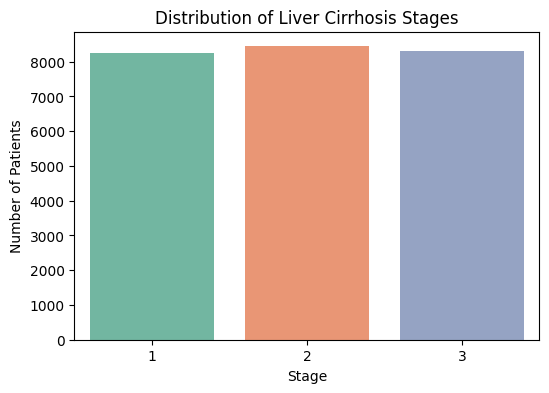

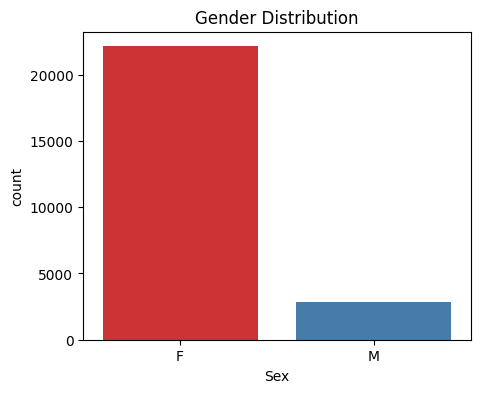

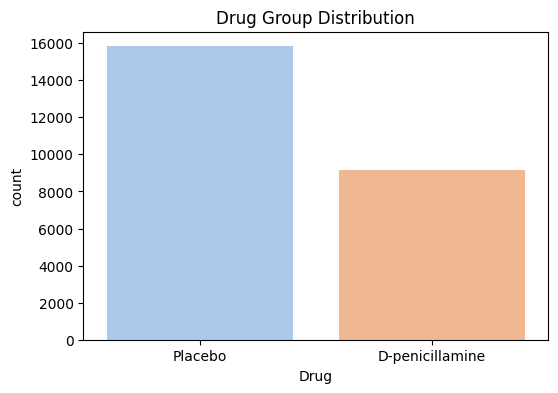

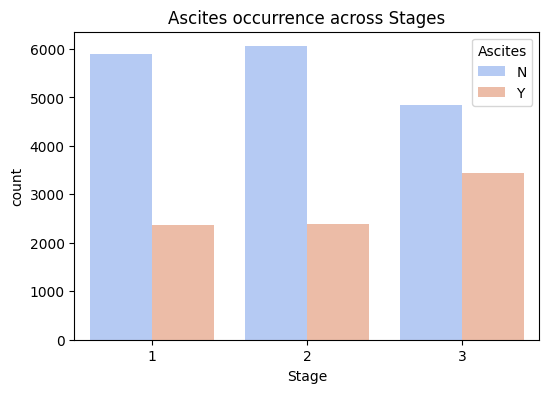

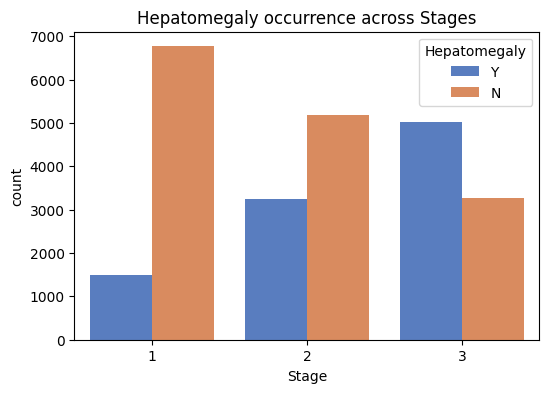

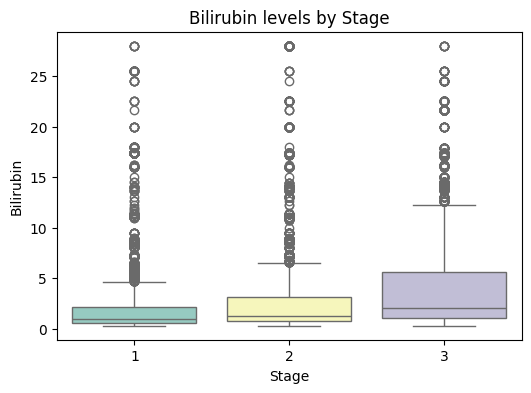

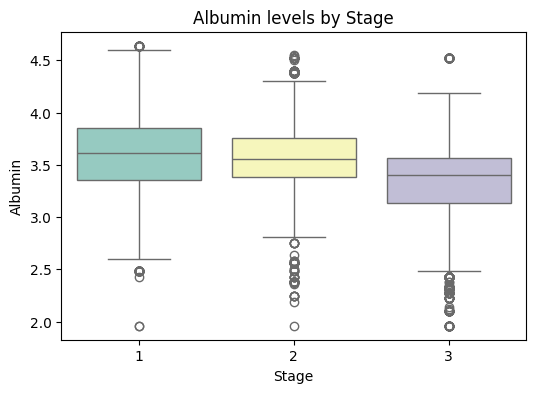

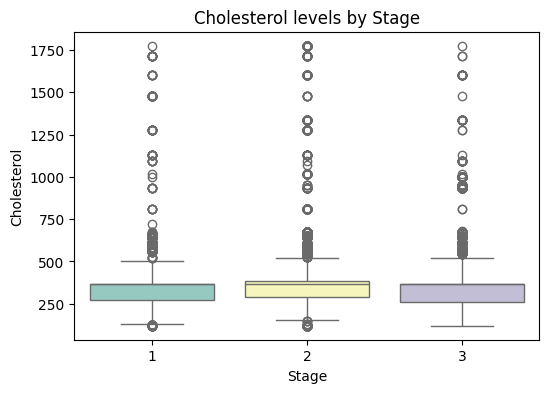

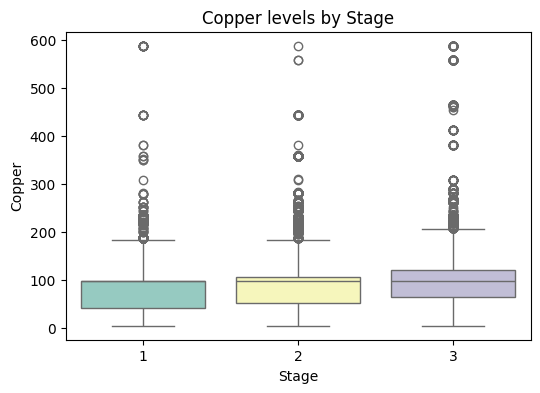

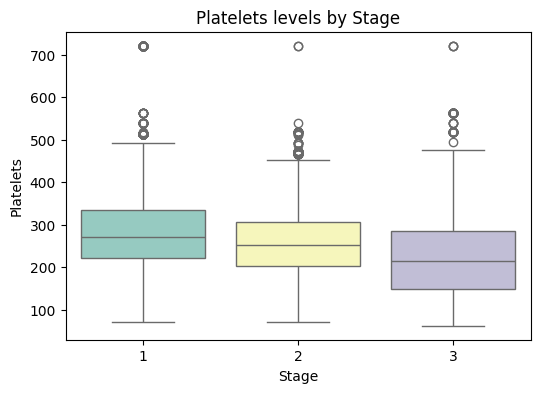

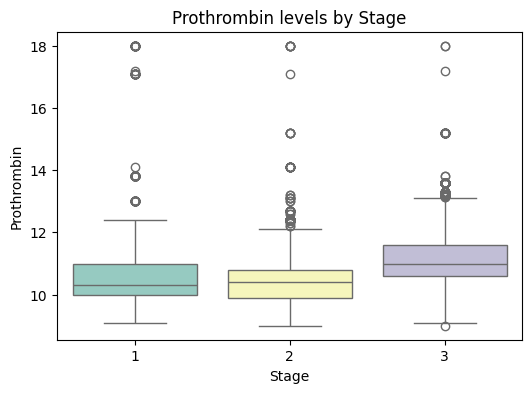

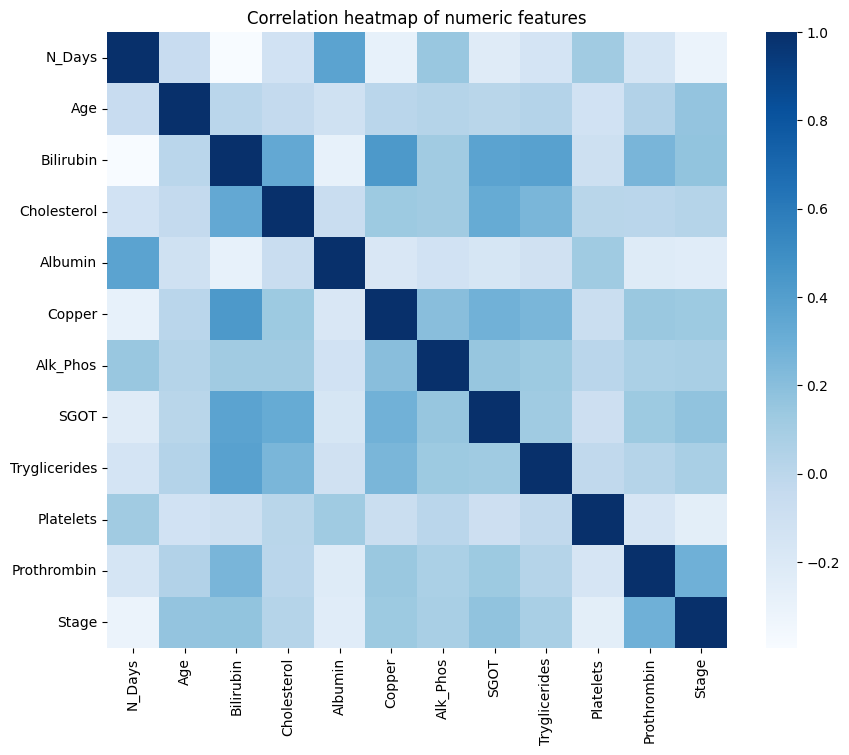

In [3]:
# 2 - EDA - optional

# Target distribution (Stage counts)
plt.figure(figsize=(6,4))
sns.countplot(x='Stage', data=df, palette="Set2")
plt.title("Distribution of Liver Cirrhosis Stages")
plt.xlabel("Stage")
plt.ylabel("Number of Patients")
plt.show()

# Gender distribution
plt.figure(figsize=(5,4))
sns.countplot(x='Sex', data=df, palette="Set1")
plt.title("Gender Distribution")
plt.show()

# Drug group distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Drug', data=df, palette="pastel")
plt.title("Drug Group Distribution")
plt.show()

# Ascites vs Stage
plt.figure(figsize=(6,4))
sns.countplot(x='Stage', hue='Ascites', data=df, palette="coolwarm")
plt.title("Ascites occurrence across Stages")
plt.show()

# Hepatomegaly vs Stage
plt.figure(figsize=(6,4))
sns.countplot(x='Stage', hue='Hepatomegaly', data=df, palette="muted")
plt.title("Hepatomegaly occurrence across Stages")
plt.show()

# Boxplots for key lab values by Stage
key_labs = ['Bilirubin','Albumin','Cholesterol','Copper','Platelets','Prothrombin']
for col in key_labs:
    if col in df.columns:
        plt.figure(figsize=(6,4))
        sns.boxplot(x='Stage', y=col, data=df, palette="Set3")
        plt.title(f"{col} levels by Stage")
        plt.show()

# Correlation heatmap of numeric variables
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap="Blues")
plt.title("Correlation heatmap of numeric features")
plt.show()

In [4]:
# 3 - Preprocessing

df2 = df.copy()

# Age -> years (if Age present and is in days)
if 'Age' in df2.columns:
    df2['Age_years'] = df2['Age'] / 365.25

# Edema mapping (ordinal)
if 'Edema' in df2.columns:
    edema_map = {'N':0, 'S':1, 'Y':2}
    df2['Edema_mapped'] = df2['Edema'].map(edema_map)

# Binary Y/N mapping
for c in ['Ascites','Hepatomegaly','Spiders']:
    if c in df2.columns:
        df2[c + "_bin"] = df2[c].map({'N':0, 'Y':1})

# Sex mapping
if 'Sex' in df2.columns:
    df2['Sex_bin'] = df2['Sex'].map({'F':0, 'M':1})

# One-hot for Drug and Status (drop first to avoid collinearity; tree models don't care but LR does)
ohe_cols = [c for c in ['Drug','Status'] if c in df2.columns]
if ohe_cols:
    df2 = pd.get_dummies(df2, columns=ohe_cols, drop_first=True)

# Drop columns we won't use directly (keep Stage and numeric features)
drop_cols = []
for c in ['N_Days','Age','Edema','Sex','Ascites','Hepatomegaly','Spiders']:
    if c in df2.columns:
        drop_cols.append(c)
df2 = df2.drop(columns=drop_cols, errors='ignore')

# Fill numeric NaNs with median (defensive)
num_cols = df2.select_dtypes(include=[np.number]).columns.tolist()
num_cols = [c for c in num_cols if c != 'Stage']  # exclude target
for c in num_cols:
    if df2[c].isnull().any():
        df2[c].fillna(df2[c].median(), inplace=True)

print("Prepared features shape:", df2.shape)
display(df2.head())

Prepared features shape: (25000, 19)


,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Age_years,Edema_mapped,Ascites_bin,Hepatomegaly_bin,Spiders_bin,Sex_bin,Drug_Placebo,Status_CL,Status_D
0,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1,50.647502,0,0,1,0,0,True,False,False
1,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2,54.001369,0,1,0,1,1,True,False,False
2,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2,32.413415,0,0,0,0,0,True,False,False
3,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2,45.084189,0,0,0,0,0,True,False,True
4,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1,59.408624,0,0,1,0,0,True,False,True


In [5]:
# 4 - Train/test split

X = df2.drop(columns=['Stage'])

# shift labels: Stage {1,2,3} -> {0,1,2} , caused error in # 7
y = df2['Stage'].astype(int) - 1

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)

print("Train / Test shapes:", X_train.shape, X_test.shape)
print("Unique classes after shift:", np.unique(y_train))

Train / Test shapes: (20000, 18) (5000, 18)
Unique classes after shift: [0 1 2]


In [6]:
# 5 - Baseline model: Multinomial Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Build pipeline: scaling -> logistic (multinomial)
num_cols_in_X = X.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric feature list:", num_cols_in_X)

pipe_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(multi_class='multinomial', max_iter=2000, random_state=42))
])

pipe_lr.fit(X_train[num_cols_in_X], y_train)
y_pred_lr = pipe_lr.predict(X_test[num_cols_in_X])
print("Logistic Regression results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Macro F1:", f1_score(y_test, y_pred_lr, average='macro'))
print(classification_report(y_test, y_pred_lr))

Numeric feature list: ['Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Age_years', 'Edema_mapped', 'Ascites_bin', 'Hepatomegaly_bin', 'Spiders_bin', 'Sex_bin']
Logistic Regression results:
Accuracy: 0.565
Macro F1: 0.5619240924676383
              precision    recall  f1-score   support

           0       0.55      0.59      0.57      1653
           1       0.49      0.42      0.45      1688
           2       0.65      0.69      0.67      1659

    accuracy                           0.56      5000
   macro avg       0.56      0.57      0.56      5000
weighted avg       0.56      0.56      0.56      5000



In [7]:
# 6 - Random Forest

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1, class_weight=None)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Macro F1:", f1_score(y_test, y_pred_rf, average='macro'))
print(classification_report(y_test, y_pred_rf))

# Feature importance
importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print("Top features (RandomForest):")
display(importances.head(15).to_frame('importance'))

Random Forest results:
Accuracy: 0.9558
Macro F1: 0.9558438160345775
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1653
           1       0.94      0.96      0.95      1688
           2       0.97      0.97      0.97      1659

    accuracy                           0.96      5000
   macro avg       0.96      0.96      0.96      5000
weighted avg       0.96      0.96      0.96      5000

Top features (RandomForest):


,importance
Prothrombin,0.149330
Platelets,0.130841
Albumin,0.127876
Age_years,0.096549
Bilirubin,0.081243
SGOT,0.055066
Alk_Phos,0.054151
Copper,0.053408
Hepatomegaly_bin,0.048921
Tryglicerides,0.047489


In [8]:
# 7 - XGBoost tuning (RandomizedSearchCV)

from xgboost import XGBClassifier
from scipy.stats import randint, uniform

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42, n_jobs=-1)

param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.5, 0.5)
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
rs = RandomizedSearchCV(xgb, param_distributions=param_dist, n_iter=25, scoring='f1_macro',
                        cv=cv, verbose=1, random_state=42, n_jobs=-1)

# train on full features (X_train)

rs.fit(X_train, y_train)
print("Best XGB params:", rs.best_params_)
best_xgb = rs.best_estimator_

y_pred_xgb = best_xgb.predict(X_test)
print("XGBoost results:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Macro F1:", f1_score(y_test, y_pred_xgb, average='macro'))
print(classification_report(y_test, y_pred_xgb))

Fitting 3 folds for each of 25 candidates, totalling 75 fits
Best XGB params: {'colsample_bytree': np.float64(0.5127095633720475), 'learning_rate': np.float64(0.042367428097991336), 'max_depth': 9, 'n_estimators': 451, 'subsample': np.float64(0.8545641645055122)}
XGBoost results:
Accuracy: 0.9668
Macro F1: 0.9668421091914469
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1653
           1       0.95      0.97      0.96      1688
           2       0.98      0.98      0.98      1659

    accuracy                           0.97      5000
   macro avg       0.97      0.97      0.97      5000
weighted avg       0.97      0.97      0.97      5000



In [9]:
# 8 - XGBoost with RandomizedSearchCV

from xgboost import XGBClassifier
from scipy.stats import randint, uniform
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42, n_jobs=-1)

param_dist = {
    'n_estimators': randint(100, 400),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.5, 0.5)
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
rs = RandomizedSearchCV(xgb, param_distributions=param_dist, n_iter=25,
                        scoring='f1_macro', cv=cv, verbose=1,
                        random_state=42, n_jobs=-1)
rs.fit(X_train, y_train)

print("\nBest XGB params:", rs.best_params_)
best_xgb = rs.best_estimator_

y_pred_xgb = best_xgb.predict(X_test)

print("\nXGBoost results:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Macro F1:", f1_score(y_test, y_pred_xgb, average='macro'))
print(classification_report(y_test+1, y_pred_xgb+1))


Fitting 3 folds for each of 25 candidates, totalling 75 fits

Best XGB params: {'colsample_bytree': np.float64(0.7248770666848828), 'learning_rate': np.float64(0.12854507080054434), 'max_depth': 6, 'n_estimators': 369, 'subsample': np.float64(0.8909087983425683)}

XGBoost results:
Accuracy: 0.9654
Macro F1: 0.9654351422110171
              precision    recall  f1-score   support

           1       0.97      0.95      0.96      1653
           2       0.95      0.97      0.96      1688
           3       0.98      0.97      0.98      1659

    accuracy                           0.97      5000
   macro avg       0.97      0.97      0.97      5000
weighted avg       0.97      0.97      0.97      5000



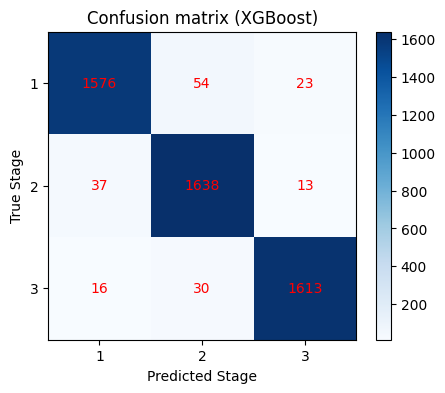

In [10]:
# 9 - Confusion Matrix for XGB

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test+1, y_pred_xgb+1)
plt.figure(figsize=(5,4))
plt.imshow(cm, interpolation='nearest', cmap="Blues")
plt.title("Confusion matrix (XGBoost)")
plt.colorbar()
plt.xlabel("Predicted Stage")
plt.ylabel("True Stage")
plt.xticks([0,1,2], ['1','2','3'])
plt.yticks([0,1,2], ['1','2','3'])
for i in range(3):
    for j in range(3):
        plt.text(j, i, cm[i, j], ha='center', va='center', color="red")
plt.show()

In [11]:
# 10 - Save model

import joblib
joblib.dump(best_xgb, "liver_stage_model_xgb.joblib")
print("Saved model to liver_stage_model_xgb.joblib")

Saved model to liver_stage_model_xgb.joblib


In [12]:
# 11 - Summary

from tabulate import tabulate

results = []

# Logistic Regression
results.append([
    "Logistic Regression",
    round(accuracy_score(y_test, y_pred_lr), 4),
    round(f1_score(y_test, y_pred_lr, average='macro'), 4)
])

# Random Forest
results.append([
    "Random Forest",
    round(accuracy_score(y_test, y_pred_rf), 4),
    round(f1_score(y_test, y_pred_rf, average='macro'), 4)
])

# XGBoost
results.append([
    "XGBoost (tuned)",
    round(accuracy_score(y_test, y_pred_xgb), 4),
    round(f1_score(y_test, y_pred_xgb, average='macro'), 4)
])

# Print
print("\n=== Model Comparison on Test Data ===")
print(tabulate(results, headers=["Model","Accuracy","Macro F1"], tablefmt="github"))

# Identify best
best_model = max(results, key=lambda x: x[2])  # based on Macro F1
print(f"\nBest performing model: {best_model[0]} "
      f"(Accuracy={best_model[1]}, Macro F1={best_model[2]})")


=== Model Comparison on Test Data ===
| Model               |   Accuracy |   Macro F1 |
|---------------------|------------|------------|
| Logistic Regression |     0.565  |     0.5619 |
| Random Forest       |     0.9558 |     0.9558 |
| XGBoost (tuned)     |     0.9654 |     0.9654 |

Best performing model: XGBoost (tuned) (Accuracy=0.9654, Macro F1=0.9654)


In [13]:
# 12 - Example Prediction with Best Model (XGBoost)

def prepare_input(patient_dict, template_df):
    """
    patient_dict: dict with keys matching feature names before training
    template_df: dataframe (X_train or X_test) for column structure
    """
    df_input = pd.DataFrame([patient_dict])

    # Age to years
    if 'Age' in df_input.columns:
        df_input['Age_years'] = df_input['Age'] / 365.25

    # Edema mapping
    if 'Edema' in df_input.columns:
        edema_map = {'N':0, 'S':1, 'Y':2}
        df_input['Edema_mapped'] = df_input['Edema'].map(edema_map)

    # Binary Y/N
    for c in ['Ascites','Hepatomegaly','Spiders']:
        if c in df_input.columns:
            df_input[c + "_bin"] = df_input[c].map({'N':0, 'Y':1})

    # Sex mapping
    if 'Sex' in df_input.columns:
        df_input['Sex_bin'] = df_input['Sex'].map({'F':0, 'M':1})

    # One-hot encoding for Drug and Status (must match training)
    df_input = pd.get_dummies(df_input, columns=['Drug','Status'], drop_first=True)

    # Drop unused originals
    df_input = df_input.drop(columns=['N_Days','Age','Edema','Sex','Ascites','Hepatomegaly','Spiders'], errors='ignore')

    # Reindex to match training columns
    df_input = df_input.reindex(columns=template_df.columns, fill_value=0)
    return df_input

# Example patient dictionary
example_patient = {
    "N_Days": 500,
    "Status": "C",
    "Drug": "D-penicillamine",
    "Age": 55*365,           # age in days (55 years)
    "Sex": "M",
    "Ascites": "Y",
    "Hepatomegaly": "Y",
    "Spiders": "Y",
    "Edema": "Y",
    "Bilirubin": 3.2,
    "Cholesterol": 180,
    "Albumin": 2.8,
    "Copper": 150,
    "Alk_Phos": 120,
    "SGOT": 70,
    "Tryglicerides": 160,
    "Platelets": 90,
    "Prothrombin": 12
}

# Prepare and predict
X_new = prepare_input(example_patient, X_train)
y_pred_new = best_xgb.predict(X_new)[0]
y_proba_new = best_xgb.predict_proba(X_new)[0]

print("\n=== New Patient Prediction ===")
print("Predicted Stage:", y_pred_new+1)   # +1 to map back {0,1,2} -> {1,2,3}
print("Probabilities:")
for i, p in enumerate(y_proba_new, start=1):
    print(f"  Stage {i}: {p:.3f}")


=== New Patient Prediction ===
Predicted Stage: 3
Probabilities:
  Stage 1: 0.001
  Stage 2: 0.000
  Stage 3: 0.999
